# Clustering using CAMI dataset part 2

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import dash_bio
import sys
import seaborn as sns
from pandas.plotting import scatter_matrix
from tsne import bh_sne
from sklearn.decomposition import PCA
from skbio.stats.composition import ilr, clr, multiplicative_replacement

In [45]:
df_blast=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.blastp.tsv", sep="\t", header=None, usecols=[0, 1, 2, 10, 11])
df_blast=df_blast.rename(columns={0:"qseqid", 1: "sseqid", 2:"pident", 10:"e-value", 11:"bitscore"})
df_blast

,qseqid,sseqid,pident,e-value,bitscore
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0
1,S|S1|C15_1,GCA_900549995.1,78.9,1.200000e-32,128.0
2,S|S1|C15_1,GCA_900550235.1,78.9,1.070000e-31,125.0
3,S|S1|C15_1,GCA_905197485.1,80.3,2.730000e-31,124.0
4,S|S1|C15_1,GCF_016900655.1,76.0,3.750000e-31,124.0
...,...,...,...,...,...
11747314,S|S1|C55794_6,GCF_900107195.1,46.2,2.570000e-61,203.0
11747315,S|S1|C55794_6,GCF_007004735.1,44.1,2.990000e-61,203.0
11747316,S|S1|C55794_6,GCF_000337835.1,43.7,3.280000e-61,203.0
11747317,S|S1|C55794_6,GCF_009674605.1,45.6,3.900000e-61,202.0


In [46]:
mapTaxid_df=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/gtdb-taxdump/R207/taxid.map", sep="\t",header=None)
mapTaxid_df=mapTaxid_df.rename(columns={0:"sseqid", 1: "taxid"})
mapTaxid_df


,sseqid,taxid
0,GCF_000979375.1,1349515035
1,GCF_000970165.1,1457399847
2,GCF_000979555.1,732503645
3,GCF_000980105.1,2988443261
4,GCF_000007065.1,369781300
...,...,...
317537,GCA_003222815.1,1987068165
317538,GCA_910586715.1,3806983282
317539,GCA_910583785.1,2506431460
317540,GCA_017556805.1,3295183182


In [47]:
blast_taxid_df=df_blast.merge(mapTaxid_df, on="sseqid", how="inner")
blast_taxid_df

,qseqid,sseqid,pident,e-value,bitscore,taxid
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0,1736166701
1,S|S1|C15_2,GCA_902381685.1,100.0,8.490000e-36,125.0,1736166701
2,S|S1|C15_3,GCA_902381685.1,100.0,1.410000e-126,363.0,1736166701
3,S|S1|C15_4,GCA_902381685.1,100.0,0.000000e+00,898.0,1736166701
4,S|S1|C15_5,GCA_902381685.1,100.0,0.000000e+00,919.0,1736166701
...,...,...,...,...,...,...
11747314,S|S1|C51755_318,GCA_002254415.1,38.0,9.270000e-53,183.0,768257595
11747315,S|S1|C51755_265,GCA_000010645.1,45.6,1.100000e-75,240.0,38421175
11747316,S|S1|C51755_318,GCA_002789465.1,38.4,1.210000e-56,193.0,3979176545
11747317,S|S1|C51755_352,GCA_002687275.1,27.2,2.290000e-29,124.0,4108335183


In [48]:
orf_lca_df=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.orfs.lca.tsv", sep="\t")
orf_lca_df

,qseqid,name,rank,lca
0,S|S1|C15_1,902381685,no rank,1736166701
1,S|S1|C15_2,902381685,no rank,1736166701
2,S|S1|C15_3,902381685,no rank,1736166701
3,S|S1|C15_4,902381685,no rank,1736166701
4,S|S1|C15_5,902381685,no rank,1736166701
...,...,...,...,...
68388,S|S1|C55794_2,000496235,no rank,272826040
68389,S|S1|C55794_3,000496235,no rank,272826040
68390,S|S1|C55794_4,000496235,no rank,272826040
68391,S|S1|C55794_5,000496235,no rank,272826040


In [49]:
blast_lca_df=blast_taxid_df.merge(orf_lca_df, on="qseqid", how="outer")
blast_lca_df

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0,1736166701,902381685,no rank,1736166701
1,S|S1|C15_1,GCA_900549995.1,78.9,1.200000e-32,128.0,68063635,902381685,no rank,1736166701
2,S|S1|C15_1,GCA_900550235.1,78.9,1.070000e-31,125.0,4205286776,902381685,no rank,1736166701
3,S|S1|C15_1,GCA_905197485.1,80.3,2.730000e-31,124.0,357385291,902381685,no rank,1736166701
4,S|S1|C15_1,GCF_016900655.1,76.0,3.750000e-31,124.0,3690373915,902381685,no rank,1736166701
...,...,...,...,...,...,...,...,...,...
11747314,S|S1|C53670_2,GCA_000496235.1,100.0,1.380000e-48,156.0,272826040,000496235,no rank,272826040
11747315,S|S1|C53670_3,GCA_000496235.1,100.0,3.100000e-65,200.0,272826040,000496235,no rank,272826040
11747316,S|S1|C53670_4,GCA_000496235.1,100.0,1.340000e-30,116.0,272826040,000496235,no rank,272826040
11747317,S|S1|C54222_8,GCA_000496235.1,100.0,3.810000e-42,140.0,272826040,000496235,no rank,272826040


In [50]:
blast_lca_df.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
blast_lca_df3=blast_lca_df.drop_duplicates(subset=['taxid', 'qseqid'])
blast_lca_df3

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca
4242071,S|S1|C10001_1,GCF_000011705.1,100.0,3.180000e-34,127.0,1132927932,burkholderia,genus,835133672
4242067,S|S1|C10001_1,GCF_000012365.1,98.3,1.250000e-33,125.0,1730790438,burkholderia,genus,835133672
4242069,S|S1|C10001_1,GCF_000959365.1,70.0,4.510000e-17,82.0,672627656,burkholderia,genus,835133672
4187629,S|S1|C10001_2,GCF_000011705.1,100.0,6.660000e-267,731.0,1132927932,000011705,no rank,1132927932
4187627,S|S1|C10001_2,GCF_000959365.1,83.8,5.780000e-227,630.0,672627656,000011705,no rank,1132927932
...,...,...,...,...,...,...,...,...,...
152769,S|S1|C9986_9,GCA_017399445.1,46.5,1.650000e-104,324.0,1323388952,902381685,no rank,1736166701
152848,S|S1|C9986_9,GCA_910589265.1,47.0,2.200000e-104,324.0,3481688409,902381685,no rank,1736166701
152813,S|S1|C9986_9,GCF_003478085.1,45.9,4.540000e-104,323.0,2979942861,902381685,no rank,1736166701
152814,S|S1|C9986_9,GCA_900548905.1,45.9,4.540000e-104,323.0,3828553300,902381685,no rank,1736166701


In [51]:
df_bin=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.bacteria.hdbscan.tsv", sep="\t", usecols=["contig", "cluster"])
df_bin_subset=df_bin.loc[df_bin["cluster"].isin(["bin_0002", "bin_0016", "bin_0017"])]
blast_lca_df3["contig"]=blast_lca_df3["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
df_bin_blast_subset=blast_lca_df3.merge(df_bin_subset, how="inner", on="contig")
df_bin_blast_subset


,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca,contig,cluster
0,S|S1|C10170_1,GCA_000403475.2,100.0,3.580000e-13,68.6,3881140950,md308,genus,2343901905,S|S1|C10170,bin_0002
1,S|S1|C10170_1,GCA_910575105.1,93.9,1.070000e-11,64.7,3730778532,md308,genus,2343901905,S|S1|C10170,bin_0002
2,S|S1|C10170_1,GCA_010206225.2,90.9,5.830000e-11,62.8,1719740961,md308,genus,2343901905,S|S1|C10170,bin_0002
3,S|S1|C10170_1,GCA_910584615.1,90.9,5.830000e-11,62.8,4056280857,md308,genus,2343901905,S|S1|C10170,bin_0002
4,S|S1|C10170_1,GCA_910579335.1,90.9,5.830000e-11,62.8,1880972289,md308,genus,2343901905,S|S1|C10170,bin_0002
...,...,...,...,...,...,...,...,...,...,...,...
1358299,S|S1|C9874_3,GCF_900107405.1,41.5,5.650000e-81,280.0,573577659,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358300,S|S1|C9874_3,GCA_007131435.1,43.9,9.330000e-82,280.0,2835238206,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358301,S|S1|C9874_3,GCF_900113635.1,41.2,7.870000e-81,280.0,3838567809,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358302,S|S1|C9874_3,GCA_017938145.1,32.0,1.340000e-80,280.0,1683100024,000403475,no rank,3881140950,S|S1|C9874,bin_0002


### Function for CLR transformation

In [62]:
def run_clr(df, taxa, metric):
    df_taxa=dict(list(df.groupby("rank")))[taxa]
    df=df_taxa.pivot(index="qseqid", columns="taxid", values=metric).fillna(0)
    X=df.fillna(0).to_numpy()
    X = multiplicative_replacement(X)
    X_norm=clr(X)
    norm_df = pd.DataFrame(X_norm, index=df.index)
    X=norm_df.dropna(axis="index", how="all").fillna(0).to_numpy()
    random_state = np.random.RandomState(42)
    X = PCA(n_components=50, random_state=random_state).fit_transform(X)
    n_samples, n_components = X.shape
    perplexity = 30.0
    n_rows = n_samples - 1
    scaler = 3.0
    if n_rows < (scaler * perplexity):
        perplexity = (n_rows / scaler) - 1
    embed=bh_sne(data=X,
            d=2,
            perplexity=perplexity,
            random_state=random_state,
        )
    embedded_df = pd.DataFrame(embed, index=df.index, columns=["x_1", "x_2"])
    embedded_df.reset_index(inplace=True)
    embedded_df["contig"]=embedded_df["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
    df_bin_embed=embedded_df.merge(df_bin_subset, how="inner", on="contig")
    return df_bin_embed

In [53]:
def plot_scatter(df):
    colors = {'bin_0002':'green', 'bin_0016':'red', 'bin_0017':'blue'}
    return df.plot.scatter(x="x_1", y="x_2", c=df["cluster"].map(colors), alpha=0.1,figsize = (10, 10))
    


## Subsetting database on taxonomy


###  No rank (strain level) - Pident

In [63]:
embed_noRank=run_clr(df_bin_blast_subset, "no rank", "pident")
embed_noRank

,qseqid,x_1,x_2,contig,cluster
0,S|S1|C10315_1,-1.143019,-13.030993,S|S1|C10315,bin_0002
1,S|S1|C10442_1,15.723428,-17.766250,S|S1|C10442,bin_0002
2,S|S1|C10442_10,37.351287,8.666456,S|S1|C10442,bin_0002
3,S|S1|C10442_12,34.044155,8.135016,S|S1|C10442,bin_0002
4,S|S1|C10442_15,7.569870,-5.840175,S|S1|C10442,bin_0002
...,...,...,...,...,...
2804,S|S1|C9291_6,31.553562,-10.333899,S|S1|C9291,bin_0002
2805,S|S1|C9562_4,29.167157,15.118674,S|S1|C9562,bin_0002
2806,S|S1|C9874_1,3.597630,-22.144417,S|S1|C9874,bin_0002
2807,S|S1|C9874_2,3.739417,-20.596747,S|S1|C9874,bin_0002


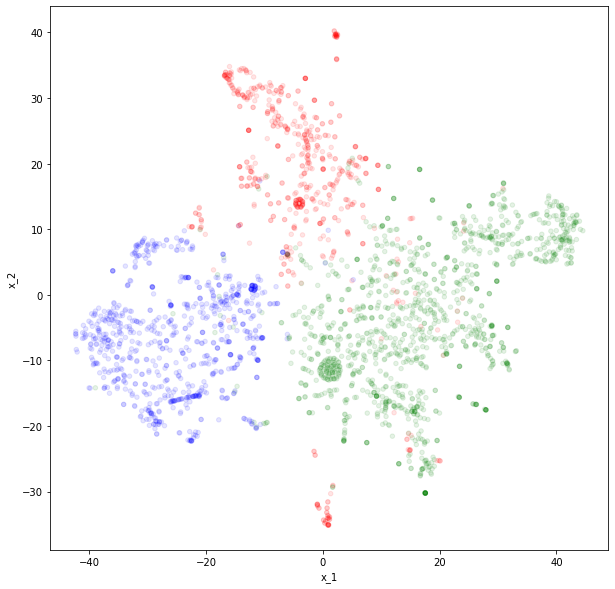

In [64]:
plot_scatter(embed_noRank)

In [65]:
embed_noRank=run_clr(df_bin_blast_subset, "no rank", "bitscore")
embed_noRank

,qseqid,x_1,x_2,contig,cluster
0,S|S1|C10315_1,-3.096834,-12.831298,S|S1|C10315,bin_0002
1,S|S1|C10442_1,16.608398,-15.298593,S|S1|C10442,bin_0002
2,S|S1|C10442_10,37.138308,9.628238,S|S1|C10442,bin_0002
3,S|S1|C10442_12,31.390216,9.573292,S|S1|C10442,bin_0002
4,S|S1|C10442_15,5.645754,-12.102158,S|S1|C10442,bin_0002
...,...,...,...,...,...
2804,S|S1|C9291_6,32.270744,-10.378543,S|S1|C9291,bin_0002
2805,S|S1|C9562_4,19.822935,9.225632,S|S1|C9562,bin_0002
2806,S|S1|C9874_1,4.921393,-22.870253,S|S1|C9874,bin_0002
2807,S|S1|C9874_2,4.150833,-21.268610,S|S1|C9874,bin_0002


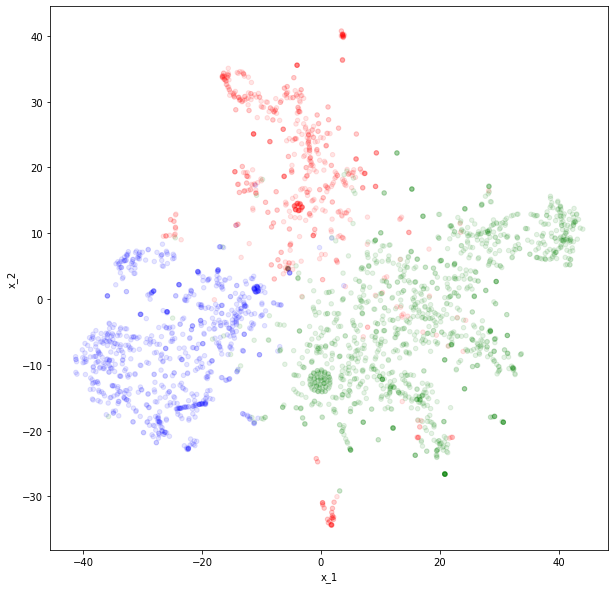

In [66]:
plot_scatter(embed_noRank)

### Genus

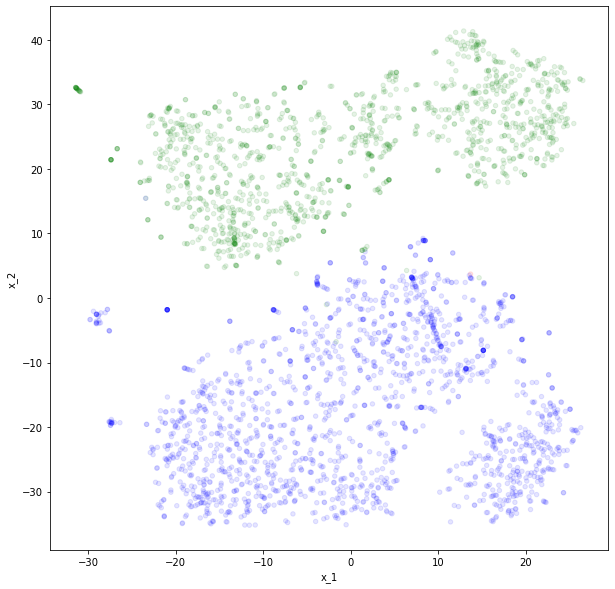

In [58]:
embed_genus=run_clr(df_bin_blast_subset, "genus", "pident")
plot_scatter(embed_genus)

### Family

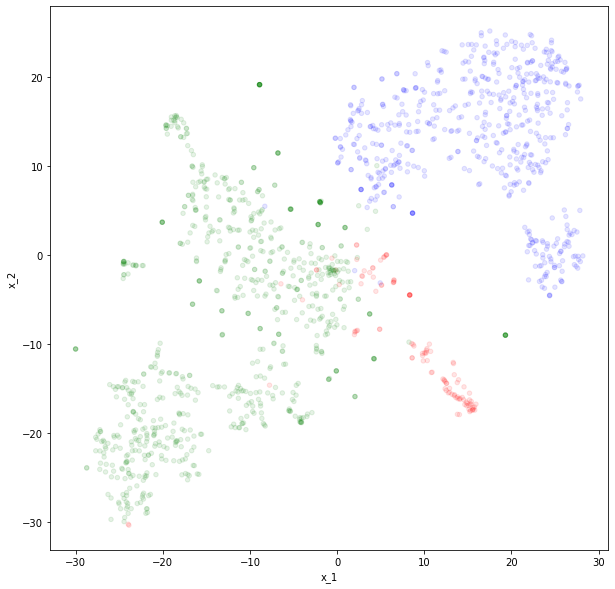

In [59]:
embed_family=run_clr(df_bin_blast_subset, "family", "pident")
plot_scatter(embed_family)